<a href="https://colab.research.google.com/github/Durgarao-git/Python-Machine_Learning-Projects/blob/main/Project_5_Gold_Price_Prediction_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor



#Import Dataset

In [ ]:
dataset=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


#Correlation

#Generate Heatmap

In [ ]:
correlation=dataset.corr()

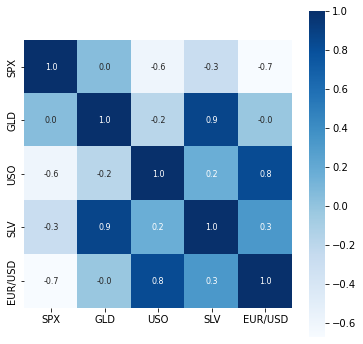

In [ ]:
plt.figure(figsize=(6,6))
sb.heatmap(correlation,cbar=True,fmt='0.1f',square=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#Checking distribution of gold

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


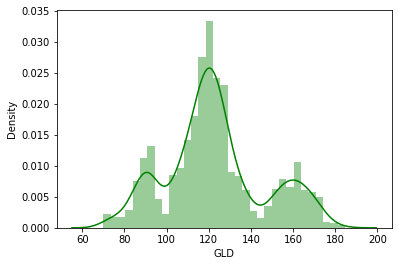

In [ ]:
sb.distplot(dataset['GLD'],color='green')

#Separating Features and Target

In [ ]:
x=dataset.drop(columns=['Date','GLD'],axis=1)
y=dataset['GLD']

In [ ]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [ ]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

#Train,Test and Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:

print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


#Model Training

In [ ]:
model=RandomForestRegressor(n_estimators=100)

In [ ]:
#Train the model
model.fit(x_train,y_train)

RandomForestRegressor()

#Model Evaluation (Test)

In [ ]:
model_pre=model.predict(x_test)

In [ ]:
#Calculating r2 error of test data
score1=metrics.r2_score(model_pre,y_test)

In [ ]:
print('the r2 score of test data: ',score1)

the r2 score of test data:  0.9893903002527428


#compare actual and predicted test values

In [ ]:
y_test=list(y_test)

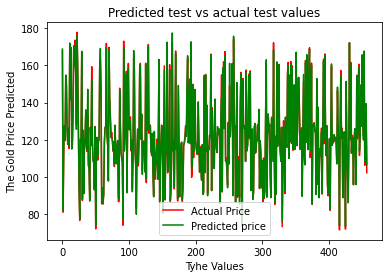

In [ ]:
plt.plot(y_test,color='red',label='Actual Price')
plt.plot(model_pre,color='green',label='Predicted price')
plt.title("Predicted test vs actual test values")
plt.xlabel('Tyhe Values')
plt.ylabel('The Gold Price Predicted')
plt.legend()
plt.show()